In [25]:
import pandas as pd
import os

In [37]:
ethanolPriceDF = pd.read_csv("../data/ethanolPrices/ethanolFuturesHistoricalData.csv")
ethanolPriceDF = ethanolPriceDF.rename(columns={"Date": "ethanolDate", "Price": "ethanolPrice", "Open": "ethanolOpen", "High": "ethanolHigh", "Low": "ethanolLow", "Vol.": "ethanolVol", "Change %":"ethanolChange"})

In [42]:
corn1 = pd.read_csv("../data/cornPrices/corn1.csv")
corn2 = pd.read_csv("../data/cornPrices/corn2.csv")
corn3 = pd.read_csv("../data/cornPrices/corn3.csv")
cornPriceDF = pd.concat([corn1,corn2,corn3])
cornPriceDF = cornPriceDF.rename(columns={"Date": "cornDate", "Price": "cornPrice", "Open": "cornOpen", "High": "cornHigh", "Low": "cornLow", "Vol.": "cornVol", "Change %":"cornChange"})

In [39]:
ethanolPriceDF.corr(method="pearson")

,ethanolPrice,ethanolOpen,ethanolHigh,ethanolLow
ethanolPrice,1.000000,0.998395,0.999069,0.999236
ethanolOpen,0.998395,1.000000,0.999205,0.998943
ethanolHigh,0.999069,0.999205,1.000000,0.998434
ethanolLow,0.999236,0.998943,0.998434,1.000000


In [57]:
cornPriceDF.corr(method="pearson")
cornPriceDF

,cornDate,cornPrice,cornOpen,cornHigh,cornLow,cornVol,cornChange
0,"Sep 24, 1999",208.75,208.25,212.50,207.75,69.89K,0.24%
1,"Sep 23, 1999",208.25,210.00,210.50,208.00,43.16K,-0.95%
2,"Sep 22, 1999",210.25,210.50,211.75,210.00,20.21K,4.60%
3,"Sep 21, 1999",201.00,201.50,202.25,201.00,0.59K,-1.23%
4,"Sep 20, 1999",203.50,198.50,204.00,197.00,2.23K,2.78%
...,...,...,...,...,...,...,...
302,"Nov 29, 2018",360.25,360.50,363.00,359.00,186.62K,-0.07%
303,"Nov 28, 2018",360.50,356.25,361.50,356.00,221.95K,1.12%
304,"Nov 27, 2018",356.50,356.00,358.50,355.50,248.13K,0.14%
305,"Nov 26, 2018",356.00,359.50,360.50,355.25,331.20K,-0.84%


In [50]:
ethanolCornDF = cornPriceDF.merge(ethanolPriceDF, left_on='cornDate', right_on='ethanolDate')

In [51]:
ethanolCornDF.corr(method="pearson")

,cornPrice,cornOpen,cornHigh,cornLow,ethanolPrice,ethanolOpen,ethanolHigh,ethanolLow
cornPrice,1.000000,0.998398,0.999181,0.999331,0.518872,0.516805,0.522461,0.512152
cornOpen,0.998398,1.000000,0.999306,0.999243,0.518168,0.517176,0.522330,0.511885
cornHigh,0.999181,0.999306,1.000000,0.999022,0.520787,0.519354,0.524795,0.514271
cornLow,0.999331,0.999243,0.999022,1.000000,0.515579,0.514119,0.519421,0.509217
ethanolPrice,0.518872,0.518168,0.520787,0.515579,1.000000,0.998396,0.999070,0.999236
ethanolOpen,0.516805,0.517176,0.519354,0.514119,0.998396,1.000000,0.999205,0.998944
ethanolHigh,0.522461,0.522330,0.524795,0.519421,0.999070,0.999205,1.000000,0.998435
ethanolLow,0.512152,0.511885,0.514271,0.509217,0.999236,0.998944,0.998435,1.000000


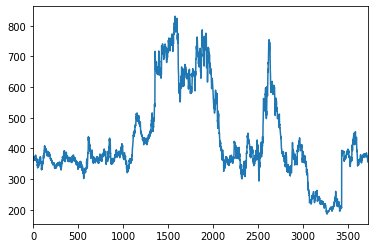

In [56]:
ethanolCornDF['cornPrice'].plot.line()